<img src="Local\imgs\U1\banner_fcd.jpg" alt="banner" width="1100"  height="150">

# <span style="color:black;"><strong>Limpieza y Estretagias de Imputación</strong></span>  
---
<p align="right">
  <a href="https://colab.research.google.com/github/mariabda2/intro_data_2025/blob/main/FCD_U4_estrategias_imputacion.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>

## <span style="color:#2F749F;"><strong>🎯 Objetivos de aprendizaje</strong></span>

> ✅ Comprender la **importancia de la imputación de datos** en el tratamiento de valores faltantes y su impacto en la calidad del análisis estadístico y predictivo.  
>  
> ✅ Diferenciar los **tipos de datos faltantes** (MCAR, MAR, MNAR) y reconocer sus implicaciones metodológicas en la selección de estrategias de imputación.  
>  
> ✅ Aplicar métodos **simples** (media, mediana, moda, constante) y **avanzados** (KNN, regresión, MICE, imputación múltiple) para reemplazar valores faltantes en distintos contextos.  
>  
> ✅ Evaluar la **idoneidad y el sesgo potencial** introducido por las técnicas de imputación, comparando resultados antes y después del tratamiento.  
>  

In [162]:
# Librerías 
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,4)

# <span style="color:#2F749F;"><strong>1. Mecanismos de datos faltantes: MCAR, MAR y MNAR</strong></span>

En el análisis de datos, la **gestión de valores faltantes** es un aspecto fundamental, ya que la naturaleza del mecanismo de ausencia influye directamente en la validez de los resultados y en la selección de métodos de imputación o modelado [(Little & Rubin, 2019)](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260).

<p align="center">
    <img src="Local\imgs\U4\missing-mcar-mar-mnar.png" alt="MCAR_MNAR" width="700"  height=300">
</p>

Imagen tomada de [feaz-book](https://feaz-book.com/missing#fig-types-of-missing).

## <span style="color:#3C3C3C;"><strong>1.1. MCAR — Missing Completely at Random</strong></span>

El mecanismo **MCAR (Missing Completely at Random)** se presenta cuando la probabilidad de que un dato esté ausente **no depende ni de las variables observadas ni de las no observadas**.  
En otras palabras, los datos faltantes son completamente aleatorios y no guardan relación con ninguna característica de los sujetos o del estudio [(Allison, 2001)](https://doi.org/10.4135/9781412985079).

Cuando los datos son MCAR, el análisis realizado sobre los datos observados produce **estimaciones no sesgadas**, aunque con menor precisión por la reducción del tamaño muestral [(Enders, 2010)](https://www.guilford.com/books/Applied-Missing-Data-Analysis/Craig-K-Enders/9781606236390).

<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Ejemplo:</b>
Si durante una encuesta algunos formularios se pierden por un error técnico, la ausencia puede considerarse MCAR.
</div>

**Resumen:**
- No introduce sesgo en las estimaciones.
- Solo reduce la potencia estadística (por la pérdida de casos).
- **Métodos válidos:** análisis de casos completos, imputación simple o múltiple, ya que la ausencia no está asociada a ninguna variable.

## <span style="color:#3C3C3C;"><strong>1.2. MAR — Missing at Random</strong></span>

El mecanismo **MAR (Missing at Random)** ocurre cuando la probabilidad de que un dato falte **depende de otras variables observadas**, pero no del valor faltante en sí.  
Bajo este supuesto, el patrón de datos ausentes puede ser modelado a partir de la información disponible, permitiendo el uso de técnicas de imputación como **MICE (Multiple Imputation by Chained Equations)** o modelos de máxima verosimilitud [(Rubin, 1976)](https://doi.org/10.1093/biomet/63.3.581).


<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Ejemplo:</b>
Si los ingresos económicos faltan con mayor frecuencia entre los encuestados de menor nivel educativo, la ausencia depende de la variable “nivel educativo”, que sí está observada.
</div>

**Resumen:**
- Requiere modelar la relación entre las variables observadas y la ausencia.
- **Métodos válidos:** imputación múltiple (MICE), modelos de máxima verosimilitud, o EM (Expectation-Maximization).
- Ignorar este mecanismo puede generar sesgo moderado.

## <span style="color:#3C3C3C;"><strong>1.3. MNAR — Missing Not at Random</strong></span>

En el caso de **MNAR (Missing Not at Random)**, la probabilidad de ausencia **depende directamente del valor faltante**.  
Esto implica que los datos no son aleatorios, y los métodos convencionales de imputación pueden producir **resultados sesgados** si no se modela explícitamente el mecanismo de ausencia [(Enders, 2010)](https://www.guilford.com/books/Applied-Missing-Data-Analysis/Craig-K-Enders/9781606236390).



<div style="background-color:#e8f4fd; padding:15px; border-radius:8px; font-size:17px;"> 
<b>Ejemplo:</b>
Si las personas con ingresos muy altos evitan declarar su salario, la ausencia depende del propio valor no reportado.
</div>

**Resumen:**
- Este mecanismo introduce sesgo sistemático, incluso al aplicar métodos de imputación tradicionales.
- Requiere modelos específicos para datos faltantes no aleatorios, como modelos de selección, modelos de patrón mixto o análisis de sensibilidad.
- Es el escenario más difícil de manejar, pues implica hacer supuestos fuertes sobre el proceso que causa la ausencia

## <span style="color:#3C3C3C;"><strong>Resumen comparativo</strong></span>
| Mecanismo | Dependencia                       | Sesgo potencial       | Métodos apropiados                             | Dificultad de manejo |
| --------- | --------------------------------- | --------------------- | ---------------------------------------------- | -------------------- |
| **MCAR**  | No depende de ninguna variable    | Ninguno               | Casos completos, imputación simple             | Baja                 |
| **MAR**   | Depende de variables observadas   | Moderado si se ignora | Imputación múltiple, máxima verosimilitud      | Media                |
| **MNAR**  | Depende del propio valor faltante | Alto                  | Modelos de selección, análisis de sensibilidad | Alta                 |


## <span style="color:#2F749F;"><strong>Ejemplo 1. Simulación de Mecanismos de Datos Faltantes en Python</strong></span>

In [163]:
# Crear 500 observaciones
n = 500
educacion = np.random.choice(['Primaria', 'Secundaria', 'Universitaria'], size=n, p=[0.3, 0.4, 0.3])
ingreso = np.random.normal(loc=50000, scale=15000, size=n)

# Ajustar ingreso según educación
ingreso[educacion == 'Primaria'] -= 10000
ingreso[educacion == 'Universitaria'] += 10000

df_original = pd.DataFrame({'Ingreso': ingreso, 'Educación': educacion})

#Aplicar mecanismos de datos faltantes
def aplicar_mcar(df, frac=0.2):
    df_mcar = df.copy()
    missing_indices = df_mcar.sample(frac=frac).index
    df_mcar.loc[missing_indices, 'Ingreso'] = np.nan
    return df_mcar

def aplicar_mar(df, frac=0.2):
    df_mar = df.copy()
    prob = df_mar['Educación'].map({'Primaria': 0.6, 'Secundaria': 0.2, 'Universitaria': 0.1})
    missing_indices = df_mar.sample(frac=frac, weights=prob).index
    df_mar.loc[missing_indices, 'Ingreso'] = np.nan
    return df_mar

def aplicar_mnar(df, frac=0.2):
    df_mnar = df.copy()
    prob = np.where(df_mnar['Ingreso'] < 45000, 0.6, 0.1)
    missing_indices = df_mnar.sample(frac=frac, weights=prob).index
    df_mnar.loc[missing_indices, 'Ingreso'] = np.nan
    return df_mnar

df_mcar = aplicar_mcar(df_original)
df_mar = aplicar_mar(df_original)
df_mnar = aplicar_mnar(df_original)

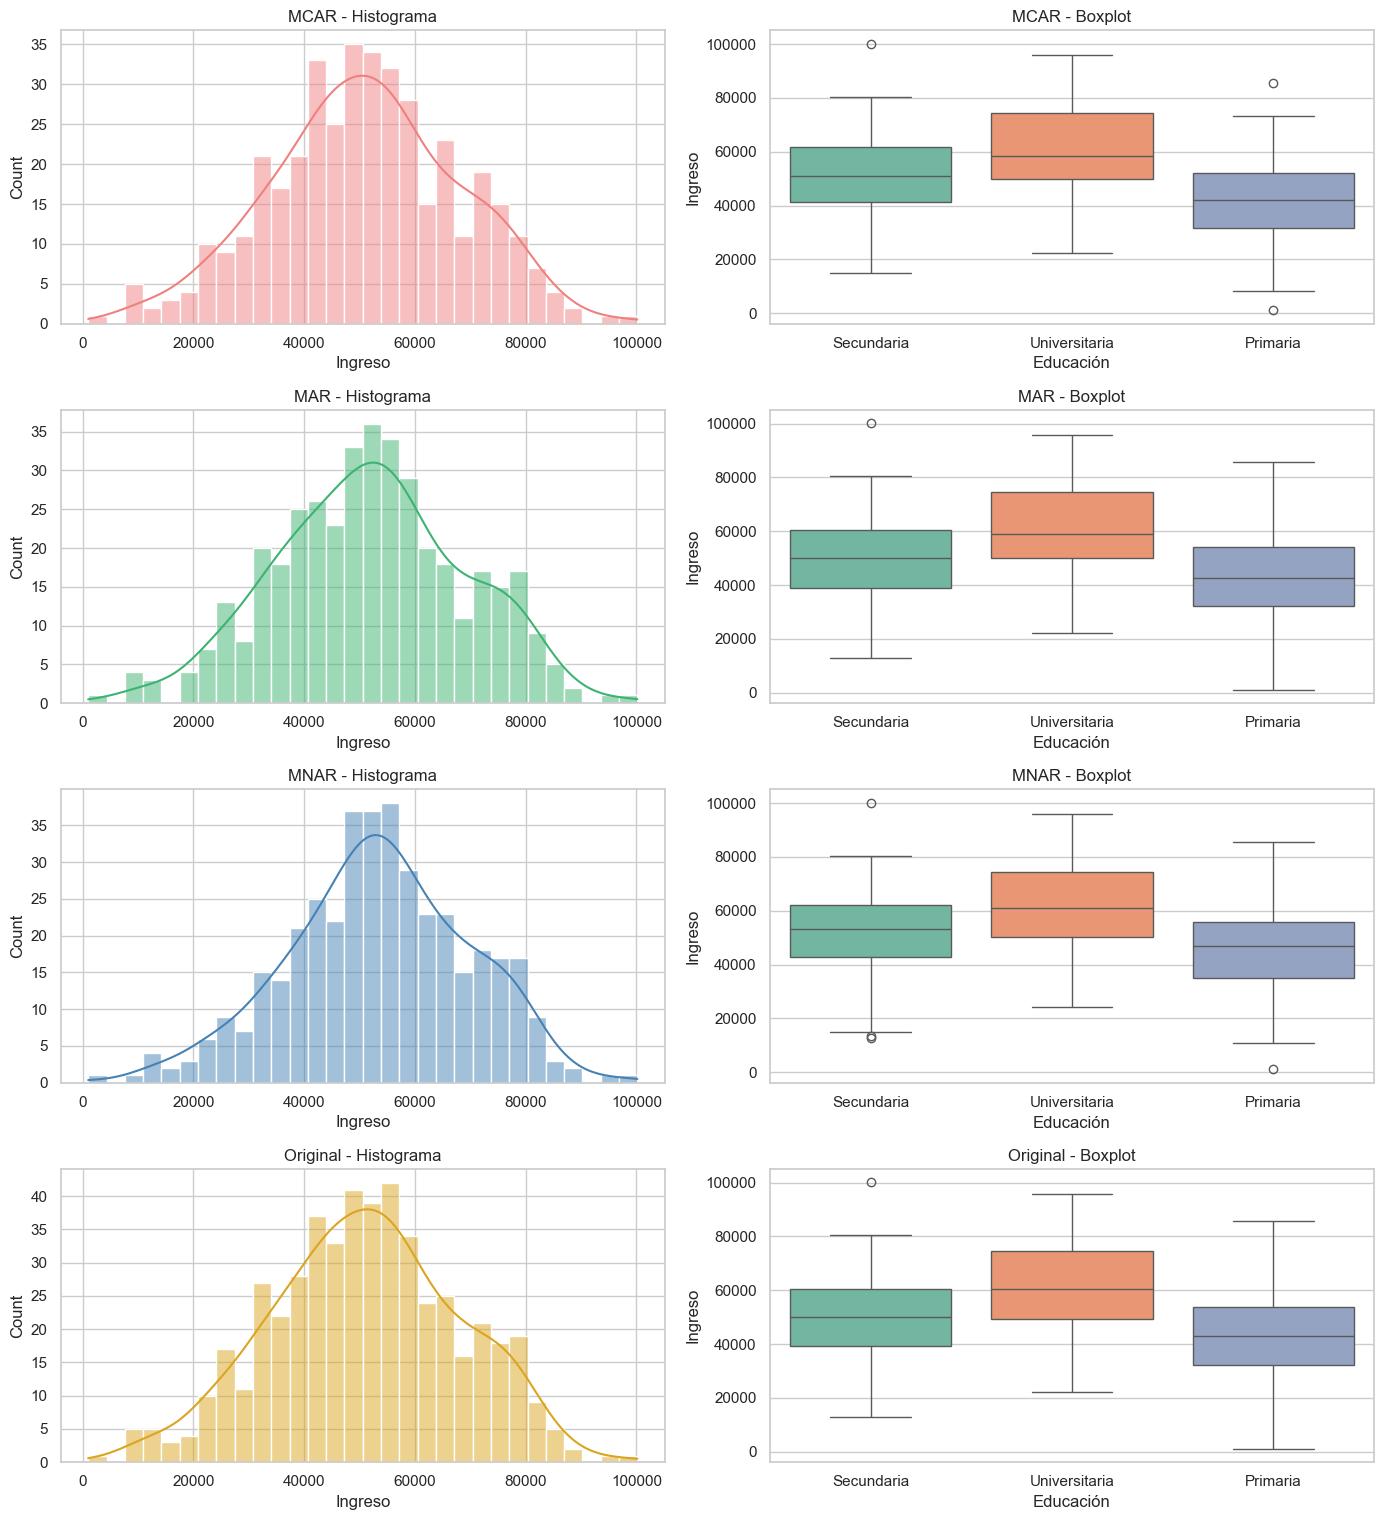

In [164]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# --- Original ---
sns.histplot(df_original['Ingreso'], kde=True, bins=30, ax=axes[3, 0], color='goldenrod')
axes[3, 0].set_title('Original - Histograma')
axes[3, 0].set_xlabel('Ingreso')

sns.boxplot(x='Educación', y='Ingreso', hue='Educación', data=df_original, palette='Set2', ax=axes[3, 1])
axes[3, 1].set_title('Original - Boxplot')
axes[3, 1].set_xlabel('Educación')
axes[3, 1].set_ylabel('Ingreso')

# --- MCAR ---
sns.histplot(df_mcar['Ingreso'], kde=True, bins=30, ax=axes[0, 0], color='lightcoral')
axes[0, 0].set_title('MCAR - Histograma')
axes[0, 0].set_xlabel('Ingreso')

sns.boxplot(x='Educación', y='Ingreso', hue='Educación', data=df_mcar, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('MCAR - Boxplot')
axes[0, 1].set_xlabel('Educación')
axes[0, 1].set_ylabel('Ingreso')

# --- MAR ---
sns.histplot(df_mar['Ingreso'], kde=True, bins=30, ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('MAR - Histograma')
axes[1, 0].set_xlabel('Ingreso')

sns.boxplot(x='Educación', y='Ingreso', hue='Educación', data=df_mar, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('MAR - Boxplot')
axes[1, 1].set_xlabel('Educación')
axes[1, 1].set_ylabel('Ingreso')

# --- MNAR ---
sns.histplot(df_mnar['Ingreso'], kde=True, bins=30, ax=axes[2, 0], color='steelblue')
axes[2, 0].set_title('MNAR - Histograma')
axes[2, 0].set_xlabel('Ingreso')

sns.boxplot(x='Educación', y='Ingreso', hue='Educación', data=df_mnar, palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title('MNAR - Boxplot')
axes[2, 1].set_xlabel('Educación')
axes[2, 1].set_ylabel('Ingreso')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


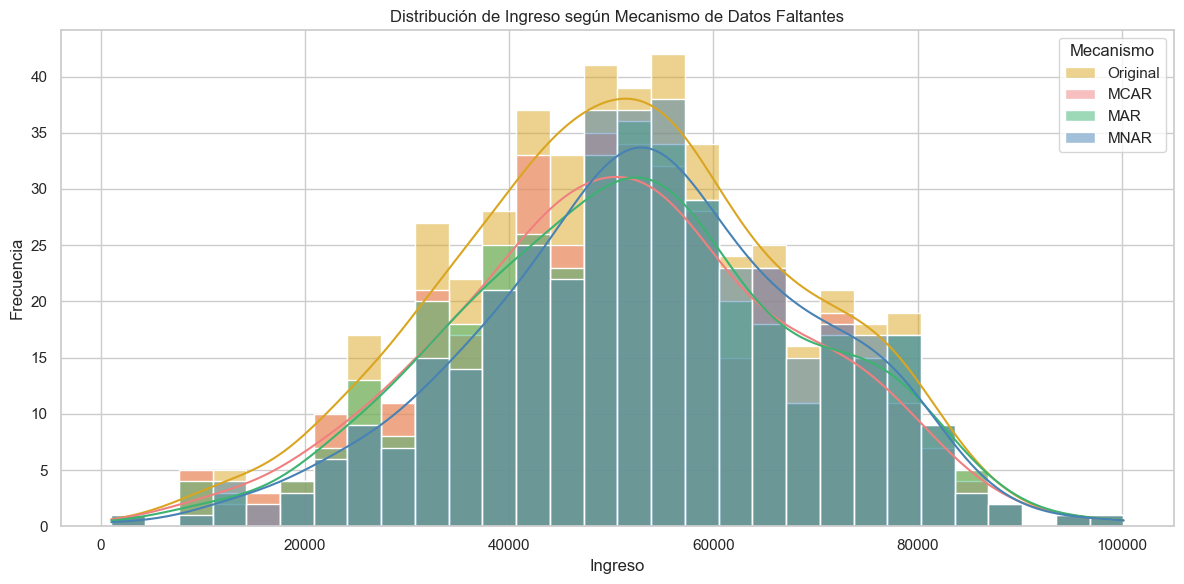

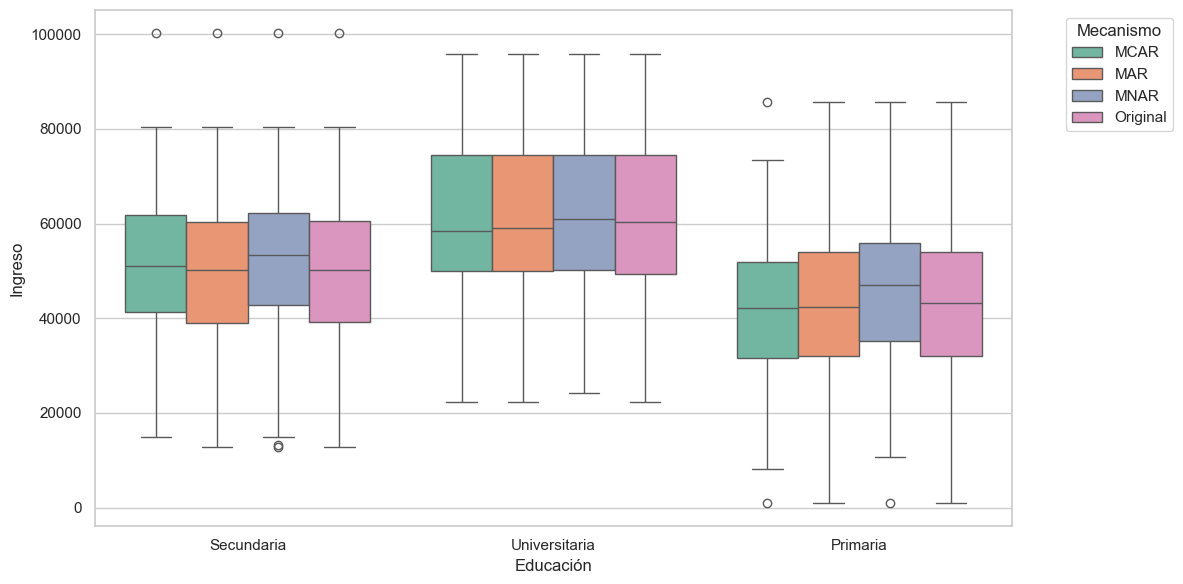

In [165]:
# Crear una columna 'Mecanismo' en cada DataFrame
df_mcar['Mecanismo'] = 'MCAR'
df_mar['Mecanismo'] = 'MAR'
df_mnar['Mecanismo'] = 'MNAR'
df_original['Mecanismo'] = 'Original'

# Unir todos los DataFrames
df_comparado = pd.concat([df_mcar, df_mar, df_mnar, df_original], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.histplot(df_original['Ingreso'], kde=True, color='goldenrod', label='Original', bins=30)
sns.histplot(df_mcar['Ingreso'], kde=True, color='lightcoral', label='MCAR', bins=30)
sns.histplot(df_mar['Ingreso'], kde=True, color='mediumseagreen', label='MAR', bins=30)
sns.histplot(df_mnar['Ingreso'], kde=True, color='steelblue', label='MNAR', bins=30)
plt.title('Distribución de Ingreso según Mecanismo de Datos Faltantes')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.legend(title='Mecanismo')
plt.tight_layout()
plt.show()

# Crear boxplot combinado
plt.figure(figsize=(12, 6))
sns.boxplot(x='Educación', y='Ingreso', hue='Mecanismo', data=df_comparado, palette='Set2')
plt.xlabel('Educación')
plt.ylabel('Ingreso')
plt.legend(title='Mecanismo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# <span style="color:#2F749F;"><strong>Imputación con K-Nearest Neighbors (KNN)</strong></span>

La **imputación con K-Nearest Neighbors (KNN)** es un método no paramétrico que utiliza la similitud entre observaciones para estimar los valores faltantes. La idea central consiste en que las observaciones con características similares (los *vecinos más cercanos*) deben tener valores parecidos en las variables ausentes [(Troyanskaya et al., 2001)](https://doi.org/10.1093/bioinformatics/17.6.520).

El algoritmo KNN identifica los **k individuos más similares** a aquel que contiene el valor faltante, calculando una medida de distancia (como la **distancia euclidiana**, **manhattan** o **minkowski**) sobre las variables disponibles.  
Luego, el valor ausente se reemplaza por una **media ponderada** (en variables numéricas) o por la **categoría más frecuente** (en variables categóricas) entre los vecinos seleccionados [(Zhang, 2012)](https://doi.org/10.1016/B978-0-12-374856-0.00015-6).


<p align="center">
    <img src="Local\imgs\U4\knn.png" alt="knnb" width="400"  height=300">
</p>

Imagen tomada de [jacobsoft.com](https://www.jacobsoft.com.mx/es_mx/k-nearest-neighbors/)

> **El algoritmo KNN sigue los siguientes pasos para determinar a que categoría pertenece el nuevo dato que se desea clasificar:**
- **Paso 1:** Selecciona el número de K vecinos
- **Paso 2:** Toma los K vecinos más cercanos al nuevo elemento de acuerdo con la distancia euclidiana
- **Paso 3:** Entre los K vecinos, contar el número de elementos que pertenece a cada categoría
- **Paso 4:** Asignar el nuevo elemento a la categoría donde se contaron más vecinos

> **Selección de los K=5 vecinos más cercanos al nuevo elemento:**

<p align="center">
    <img src="Local\imgs\U4\knn-p2.png" alt="knn-p2" width="400"  height=300">
</p>

Imagen tomada de [jacobsoft.com](https://www.jacobsoft.com.mx/es_mx/k-nearest-neighbors/)

> **Por lo tanto, la categoría con más elementos contados es la categoría 1, por lo que el nuevo elemento se asigna a la categoría 1:**

<p align="center">
    <img src="Local\imgs\U4\knn-p3.png" alt="knn-p3" width="400"  height=300">
</p>

Imagen tomada de [jacobsoft.com](https://www.jacobsoft.com.mx/es_mx/k-nearest-neighbors/)

## <span style="color:#2F749F;"><strong>Ventajas</strong></span>

- No asume una distribución estadística específica de los datos.  
- Aprovecha la **estructura local** de los datos para estimar valores realistas.  
- Puede manejar tanto variables numéricas como categóricas.  
- Útil cuando los valores faltantes son **MAR** o **MCAR** [(Enders, 2010)](https://www.guilford.com/books/Applied-Missing-Data-Analysis/Craig-K-Enders/9781606236390).


## <span style="color:#2F749F;"><strong>Limitaciones</strong></span>

- Su desempeño depende de la **elección adecuada de k** y de la **escala de las variables**.  
- Sensible a la presencia de **outliers** y **alta dimensionalidad**.  
- Requiere mayor **costo computacional** con conjuntos de datos grandes.  
- No es adecuado para mecanismos **MNAR**, ya que la ausencia depende del propio valor faltante.



## <span style="color:#2F749F;"><strong>Ejemplo 2. Predecir si un cliente comprará un producto basado en su edad y salario estimado.</strong></span> 

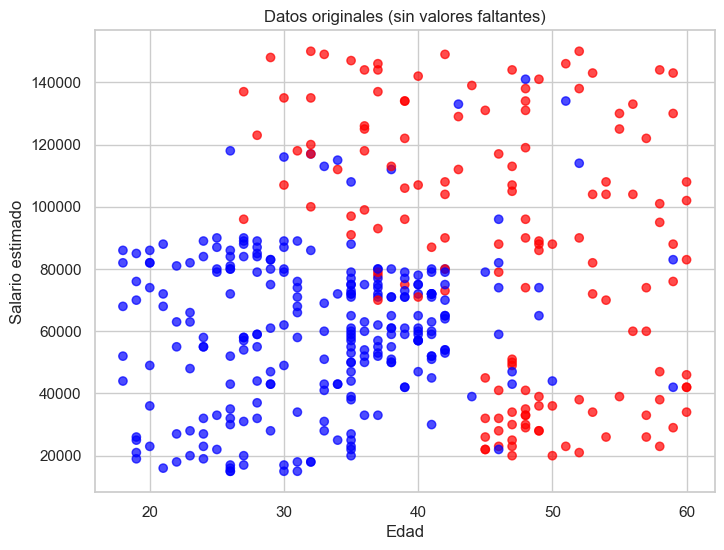

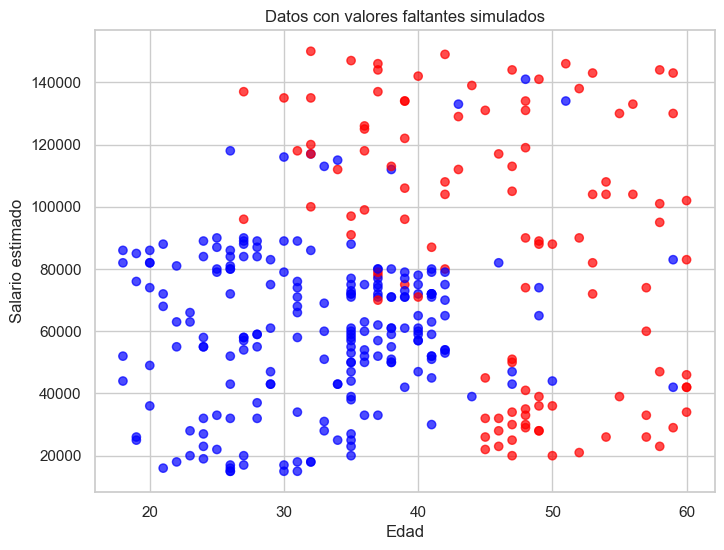

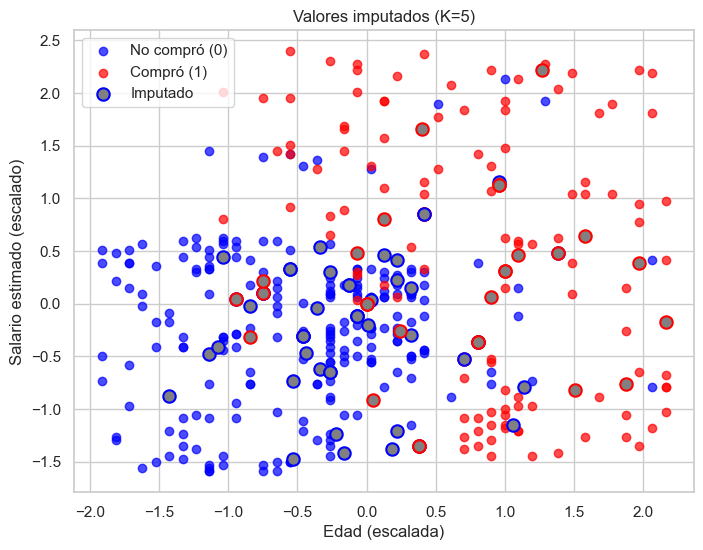

In [166]:
# Paso 1: Importar librerías
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Paso 2: Descargar y cargar el dataset
path = kagglehub.dataset_download("akram24/social-network-ads")
csv_path = f"{path}/Social_Network_Ads.csv"
dataset = pd.read_csv(csv_path)

# La variable independiente está compuesta por datos sobre el género,
# la edad y el salario estimado del cliente, sin embargo para el ejemplo 
# gráfico utilizaremos sólo la edad y el salario estimado como variables 
# independientes:

# Paso 3: Visualizar datos originales
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Age'], dataset['EstimatedSalary'],
            c=dataset['Purchased'], cmap='bwr', alpha=0.7)
plt.title('Datos originales (sin valores faltantes)')
plt.xlabel('Edad')
plt.ylabel('Salario estimado')
plt.grid(True)
plt.show()

# Paso 4: Simular valores faltantes
np.random.seed(42)
missing_rate = 0.1
n_missing = int(len(dataset) * missing_rate)

missing_age_idx = np.random.choice(dataset.index, n_missing, replace=False)
missing_salary_idx = np.random.choice(dataset.index, n_missing, replace=False)

dataset.loc[missing_age_idx, 'Age'] = np.nan
dataset.loc[missing_salary_idx, 'EstimatedSalary'] = np.nan

# Paso 5: Visualizar datos con valores faltantes
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Age'], dataset['EstimatedSalary'],
            c=dataset['Purchased'], cmap='bwr', alpha=0.7)
plt.title('Datos con valores faltantes simulados')
plt.xlabel('Edad')
plt.ylabel('Salario estimado')
plt.grid(True)
plt.show()

# ¿Por qué escalar antes de imputar?
# KNN Imputer se basa en distancias entre registros. 
# Si no escalamos, variables con rangos más grandes (como salario) 
# dominarán la imputación. Escalar primero garantiza que ambas 
# variables contribuyan equitativamente.

# Paso 6: Escalar antes de imputar
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset[['Age', 'EstimatedSalary']])

# Convertir a DataFrame para imputación
scaled_df = pd.DataFrame(scaled_data, columns=['Age', 'EstimatedSalary'])

# Paso 7: Identificar qué valores son faltantes
missing_mask = dataset[['Age', 'EstimatedSalary']].isnull().any(axis=1)

# Paso 8: Imputar valores faltantes con KNN
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

# Paso 9: Visualizar datos escalados e imputados
plt.figure(figsize=(8, 6))

# Puntos no imputados
plt.scatter(imputed_scaled[~missing_mask & (dataset['Purchased'] == 0), 0],
            imputed_scaled[~missing_mask & (dataset['Purchased'] == 0), 1],
            color='blue', label='No compró (0)', alpha=0.7)
plt.scatter(imputed_scaled[~missing_mask & (dataset['Purchased'] == 1), 0],
            imputed_scaled[~missing_mask & (dataset['Purchased'] == 1), 1],
            color='red', label='Compró (1)', alpha=0.7)

# Puntos imputados en verde con borde según categoría
for i in np.where(missing_mask)[0]:
    color = 'gray'
    edge = 'red' if dataset['Purchased'].iloc[i] == 1 else 'blue'
    plt.scatter(imputed_scaled[i, 0], imputed_scaled[i, 1],
                color=color, edgecolors=edge, linewidths=1.5,
                label='Imputado' if i == np.where(missing_mask)[0][0] else "", s=80)

plt.title('Valores imputados (K=5)')
plt.xlabel('Edad (escalada)')
plt.ylabel('Salario estimado (escalado)')
plt.legend()
plt.grid(True)
plt.show()

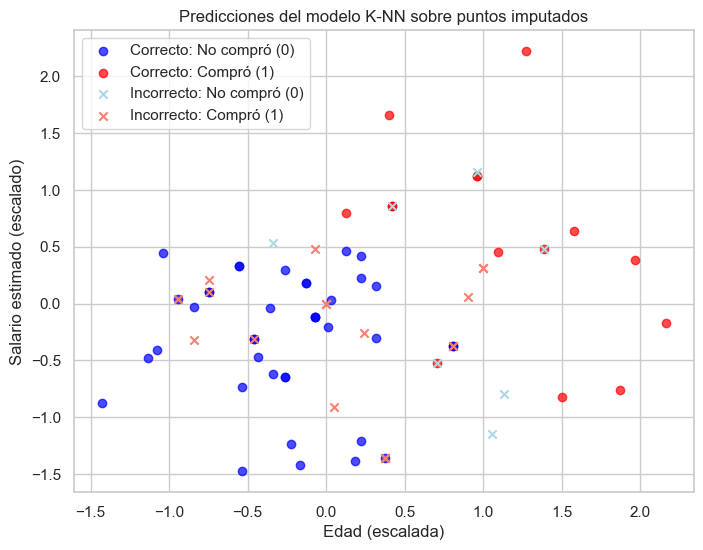

In [167]:
# Paso 1: Extraer los puntos imputados
X_imputed_only = imputed_scaled[missing_mask]
y_imputed_true = dataset['Purchased'].values[missing_mask]

# Paso 2: Predecir la categoría con el modelo entrenado
y_imputed_pred = classifier.predict(X_imputed_only)

# Paso 3: Visualizar predicciones sobre puntos imputados
plt.figure(figsize=(8, 6))

# Puntos correctamente clasificados
correct = y_imputed_pred == y_imputed_true
incorrect = ~correct

plt.scatter(X_imputed_only[correct & (y_imputed_true == 0), 0],
            X_imputed_only[correct & (y_imputed_true == 0), 1],
            color='blue', label='Correcto: No compró (0)', alpha=0.7)
plt.scatter(X_imputed_only[correct & (y_imputed_true == 1), 0],
            X_imputed_only[correct & (y_imputed_true == 1), 1],
            color='red', label='Correcto: Compró (1)', alpha=0.7)

# Puntos mal clasificados
plt.scatter(X_imputed_only[incorrect & (y_imputed_true == 0), 0],
            X_imputed_only[incorrect & (y_imputed_true == 0), 1],
            color='lightblue', label='Incorrecto: No compró (0)', marker='x')
plt.scatter(X_imputed_only[incorrect & (y_imputed_true == 1), 0],
            X_imputed_only[incorrect & (y_imputed_true == 1), 1],
            color='salmon', label='Incorrecto: Compró (1)', marker='x')

plt.title('Predicciones del modelo K-NN sobre puntos imputados')
plt.xlabel('Edad (escalada)')
plt.ylabel('Salario estimado (escalado)')
plt.legend()
plt.grid(True)
plt.show()


Cantidad de registros imputados por categoría:
No compró    46
Compró       32
Name: count, dtype: int64

Matriz de confusión (solo registros imputados):
                 Predicho: No compró  Predicho: Compró
Real: No compró                   15                17
Real: Compró                       7                39

Rendimiento del modelo sobre registros imputados:
Exactitud: 0.69
Tasa de error: 0.31


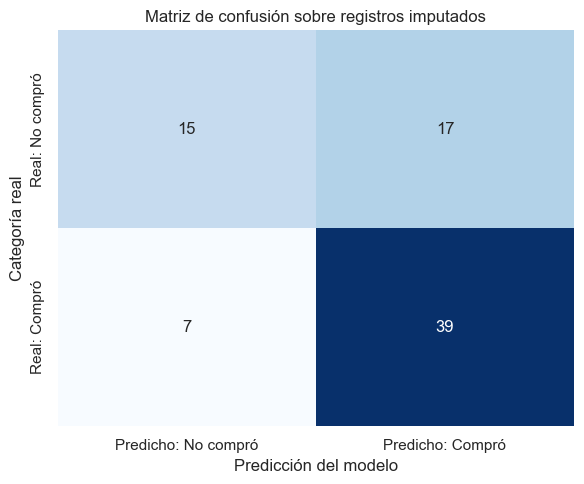

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Etiquetas legibles para categorías
y_imputed_named = np.where(y_imputed_true == 1, 'Compró', 'No compró')
y_pred_named = np.where(y_imputed_pred == 1, 'Compró', 'No compró')

# Conteo de registros imputados por categoría
conteo_categorias = pd.Series(y_imputed_named).value_counts()
print("Cantidad de registros imputados por categoría:")
print(conteo_categorias)

# Matriz de confusión en texto
matriz_confusion = pd.DataFrame(confusion_matrix(y_imputed_named, y_pred_named),
                                index=['Real: No compró', 'Real: Compró'],
                                columns=['Predicho: No compró', 'Predicho: Compró'])
print("\nMatriz de confusión (solo registros imputados):")
print(matriz_confusion)

# Métricas de rendimiento
exactitud = accuracy_score(y_imputed_named, y_pred_named)
error = 1 - exactitud
print("\nRendimiento del modelo sobre registros imputados:")
print(f"Exactitud: {exactitud:.2f}")
print(f"Tasa de error: {error:.2f}")

# Visualización gráfica de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión sobre registros imputados')
plt.xlabel('Predicción del modelo')
plt.ylabel('Categoría real')
plt.tight_layout()
plt.show()


# <span style="color:#2F749F;"><strong>Imputación por Regresión</strong></span>

La **imputación por regresión** es un método que utiliza modelos estadísticos o de aprendizaje automático para **predecir los valores faltantes** de una variable a partir de otras variables disponibles. Este enfoque asume que existe una **relación lineal o no lineal** entre la variable con datos ausentes y las variables predictoras [(Little & Rubin, 2019)](https://doi.org/10.1002/9781119482260).

El procedimiento consiste en ajustar un **modelo de regresión** (por ejemplo, lineal, logística o basada en árboles) con las observaciones completas y luego **predecir los valores faltantes** utilizando las variables explicativas.  
De esta forma, los valores imputados conservan la coherencia estadística y la correlación con otras variables del conjunto de datos [(Allison, 2001)](https://doi.org/10.4135/9781412985079).

<p align="center">
    <img src="Local\imgs\U4\regresion.png" alt="imputacion-regresion" width="700" height="300">
</p>

Imagen adaptada de [feaz-book.com](https://feaz-book.com/missing-model).

> **El procedimiento general de imputación por regresión puede resumirse en los siguientes pasos:**
- **Paso 1:** Identificar la variable con valores faltantes y seleccionar las variables predictoras más relevantes.  
- **Paso 2:** Entrenar un modelo de regresión utilizando únicamente los registros completos.  
- **Paso 3:** Utilizar el modelo ajustado para estimar (predecir) los valores ausentes.  
- **Paso 4:** Sustituir los valores faltantes por las predicciones obtenidas.  


## <span style="color:#2F749F;"><strong>Ventajas</strong></span>

- Mantiene las **relaciones estadísticas** entre variables.  
- Permite imputar valores **numéricos o categóricos**, dependiendo del modelo.  
- Suele ofrecer mayor **precisión** que métodos simples como la media o la moda.  
- Puede ampliarse a métodos más complejos (p. ej., **regresión múltiple**, **random forest**, o **modelos bayesianos**).

## <span style="color:#2F749F;"><strong>Limitaciones</strong></span>

- Asume que las relaciones entre variables están correctamente especificadas.  
- Puede **subestimar la variabilidad** si se reemplazan todos los valores faltantes por una sola predicción.  
- Sensible a **errores de modelado** y **colinealidad** entre variables predictoras.  
- No es adecuado para mecanismos **MNAR**, donde la ausencia depende directamente del valor faltante.  


## <span style="color:#2F749F;"><strong>Ejemplo 3. predecir los valores faltantes en ´EstimatedSalary´ usando ´Age´ como predictor.</strong></span> 

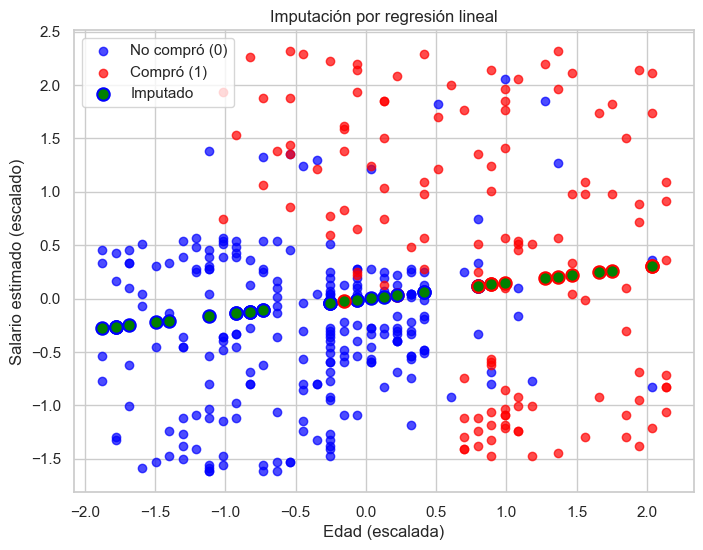

Coeficiente (w): 0.14820771230106572
Intercepto (b): -0.0006370102079610669
Polinomio con regresión lineal:
EstimatedSalary = 0.1482 * Age + -0.0006


In [169]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Cargar dataset
path = kagglehub.dataset_download("akram24/social-network-ads")
csv_path = f"{path}/Social_Network_Ads.csv"
dataset = pd.read_csv(csv_path)

# Simular valores faltantes en EstimatedSalary
np.random.seed(42)
missing_rate = 0.1
n_missing = int(len(dataset) * missing_rate)
missing_idx = np.random.choice(dataset.index, n_missing, replace=False)
dataset.loc[missing_idx, 'EstimatedSalary'] = np.nan

# Escalar Age y EstimatedSalary
sc = StandardScaler()
scaled = sc.fit_transform(dataset[['Age', 'EstimatedSalary']])
scaled_df = pd.DataFrame(scaled, columns=['Age', 'EstimatedSalary'])

# Separar datos completos y faltantes
complete_mask = ~dataset['EstimatedSalary'].isnull() # no nulos
X_train = scaled_df.loc[complete_mask, ['Age']]
y_train = scaled_df.loc[complete_mask, 'EstimatedSalary']
X_missing = scaled_df.loc[~complete_mask, ['Age']]

# Entrenar modelo de regresión
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Imputar valores faltantes
predicted_salary = regressor.predict(X_missing)
scaled_df.loc[~complete_mask, 'EstimatedSalary'] = predicted_salary

# Visualizar imputación
plt.figure(figsize=(8, 6))

# Puntos no imputados
plt.scatter(scaled_df.loc[complete_mask & (dataset['Purchased'] == 0), 'Age'],
            scaled_df.loc[complete_mask & (dataset['Purchased'] == 0), 'EstimatedSalary'],
            color='blue', label='No compró (0)', alpha=0.7)
plt.scatter(scaled_df.loc[complete_mask & (dataset['Purchased'] == 1), 'Age'],
            scaled_df.loc[complete_mask & (dataset['Purchased'] == 1), 'EstimatedSalary'],
            color='red', label='Compró (1)', alpha=0.7)

# Puntos imputados en verde con borde según categoría
for i in np.where(~complete_mask)[0]:
    color = 'green'
    edge = 'red' if dataset['Purchased'].iloc[i] == 1 else 'blue'
    plt.scatter(scaled_df.loc[i, 'Age'], scaled_df.loc[i, 'EstimatedSalary'],
                color=color, edgecolors=edge, linewidths=1.5,
                label='Imputado' if i == np.where(~complete_mask)[0][0] else "", s=80)

plt.title('Imputación por regresión lineal')
plt.xlabel('Edad (escalada)')
plt.ylabel('Salario estimado (escalado)')
plt.legend()
plt.grid(True)
plt.show()

print("Coeficiente (w):", regressor.coef_[0])
print("Intercepto (b):", regressor.intercept_)


print("Polinomio con regresión lineal:")
print(f"EstimatedSalary = {regressor.coef_[0]:.4f} * Age + {regressor.intercept_:.4f}")



# <span style="color:#2F749F;"><strong>Interpolación y métodos secuenciales (LOCF / NOCB)</strong></span>

La **interpolación** y los **métodos secuenciales** son técnicas empleadas para imputar valores faltantes en series temporales o datos ordenados secuencialmente. Su principio se basa en **estimar o propagar valores adyacentes** para mantener la continuidad y coherencia temporal del conjunto de datos [(Hyndman & Athanasopoulos, 2021)](https://otexts.com/fpp3/).

La **interpolación** calcula los valores ausentes mediante una **función matemática** que conecta los puntos conocidos. Los métodos más comunes son la **interpolación lineal**, **polinómica** o **spline**, donde se asume una transición suave entre los datos observados.  
Por otro lado, los **métodos secuenciales**, como **LOCF (Last Observation Carried Forward)** y **NOCB (Next Observation Carried Backward)**, imputan los valores faltantes propagando el último o el siguiente valor no ausente, respectivamente [(Schafer & Graham, 2002)](https://doi.org/10.1037/1082-989X.7.2.147).


> **El procedimiento general de interpolación o métodos secuenciales sigue los siguientes pasos:**
- **Paso 1:** Identificar la variable o serie temporal con valores faltantes.  
- **Paso 2:** Seleccionar el método apropiado según la naturaleza de los datos:
  - **Interpolación lineal:** se estima el valor faltante mediante la línea recta que conecta los puntos anterior y posterior.  
  - **Interpolación spline/polinómica:** se usa una función más flexible para capturar curvaturas.  
  - **LOCF:** se replica el último valor observado hacia adelante.  
  - **NOCB:** se replica el siguiente valor observado hacia atrás.  
- **Paso 3:** Verificar la coherencia de la serie imputada y la continuidad en las transiciones.  


> **Ejemplo:** En un registro de temperatura horaria donde se pierden datos por fallas en el sensor, la interpolación lineal puede estimar valores intermedios. Si el análisis busca conservar la tendencia local sin modificar la estructura, se pueden aplicar LOCF o NOCB según la dirección del tiempo.

## <span style="color:#2F749F;"><strong>Ventajas</strong></span>

- Fáciles de implementar y de **bajo costo computacional**.  
- Preservan la **coherencia temporal** y la **secuencia lógica** de los datos.  
- Adecuados para **series regulares** con pequeños vacíos o interrupciones.  
- Los métodos LOCF y NOCB no introducen valores fuera del rango observado.  

## <span style="color:#2F749F;"><strong>Limitaciones</strong></span>

- No capturan **cambios abruptos o no lineales** si se usa interpolación simple.  
- LOCF y NOCB pueden **distorsionar tendencias** al repetir valores sin variación.  
- Inapropiados para grandes tramos de datos faltantes o cuando los valores ausentes son **MNAR**.  
- Requieren precaución en contextos donde la **dependencia temporal** influye en el análisis posterior.  


## <span style="color:#2F749F;"><strong>Ejemplo 4. Predecir los valores faltantes en CO(GT) usando LOCF y NOCB. </strong></span> 

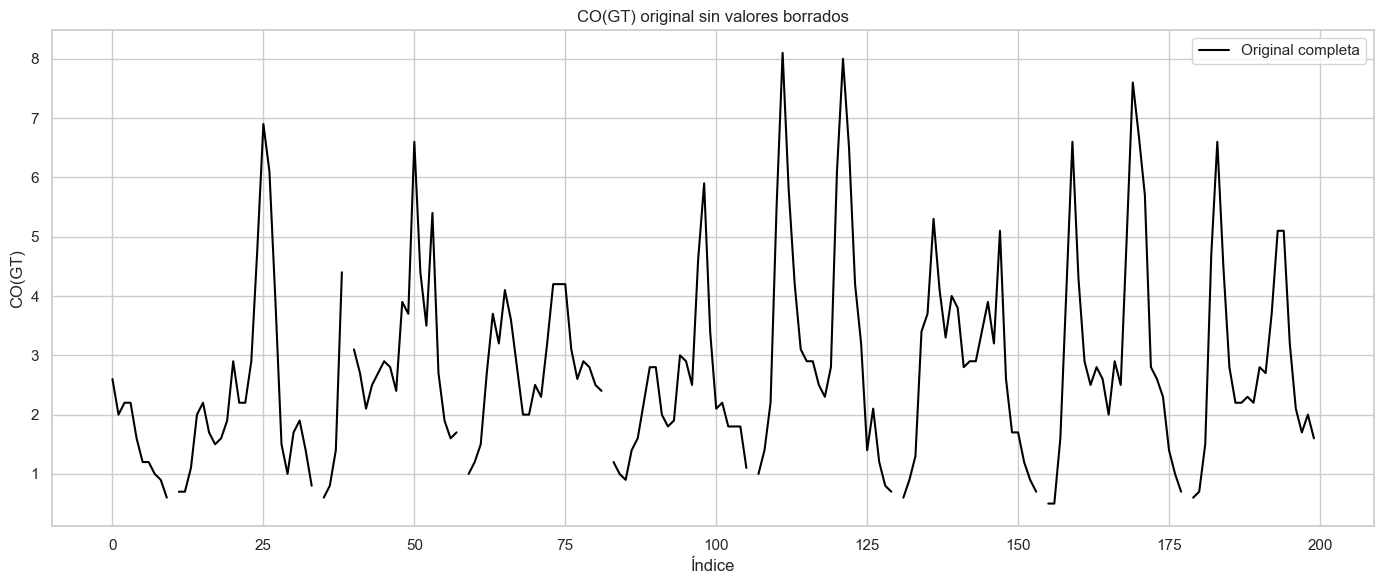

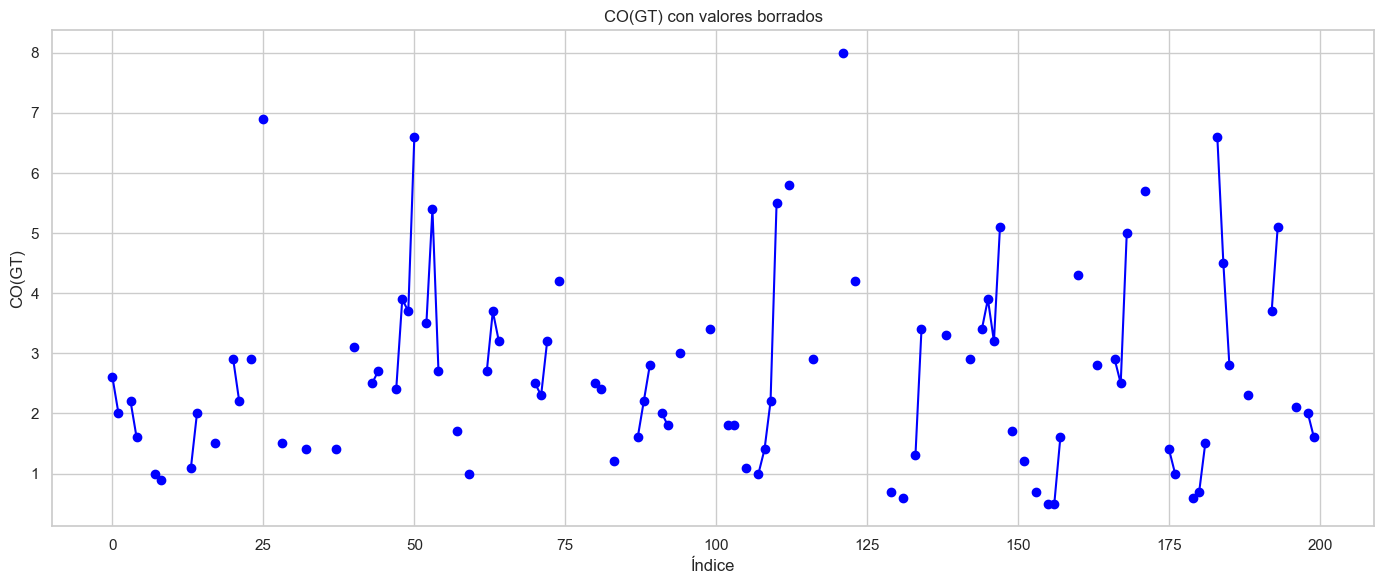

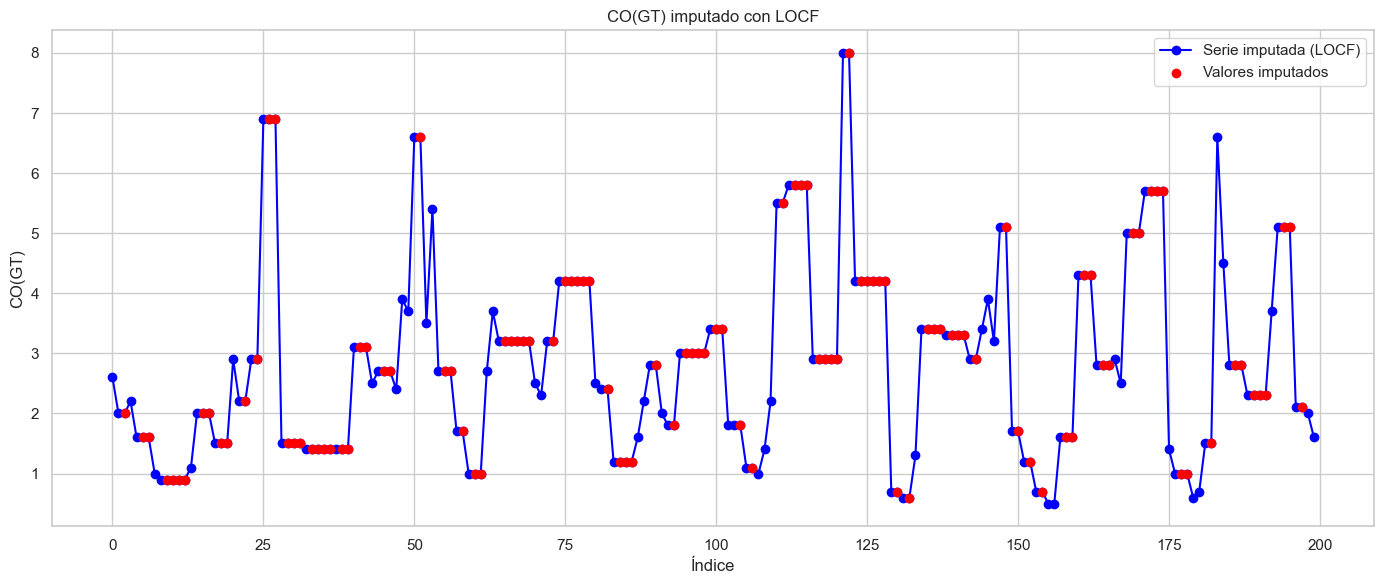

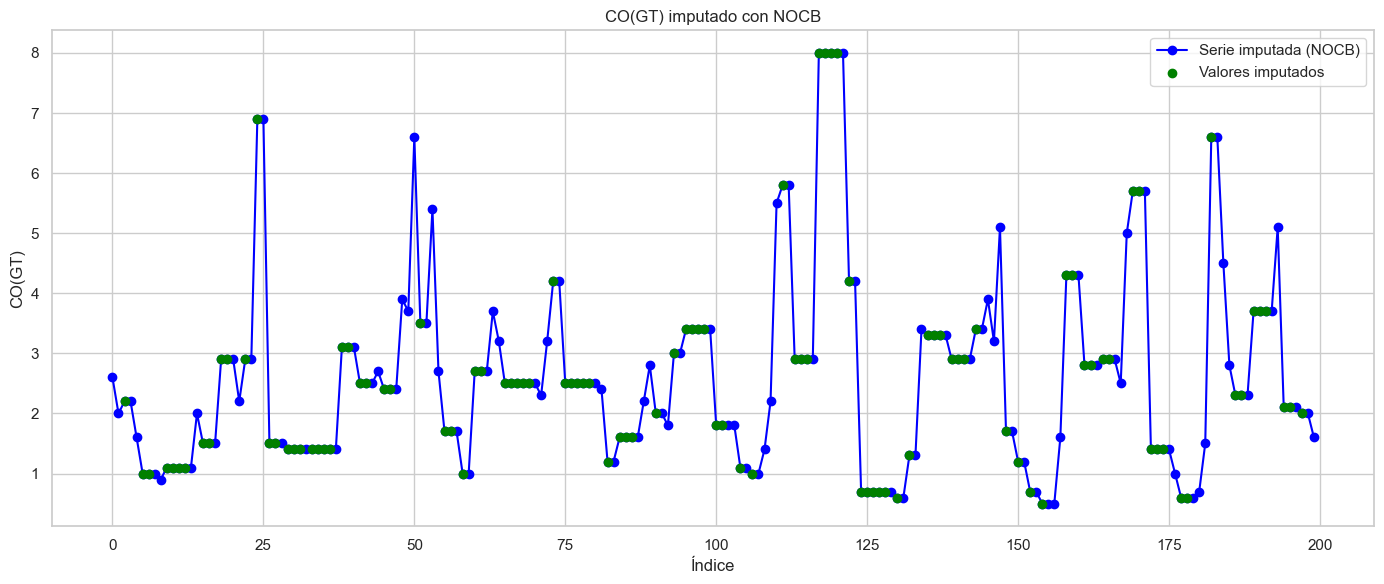

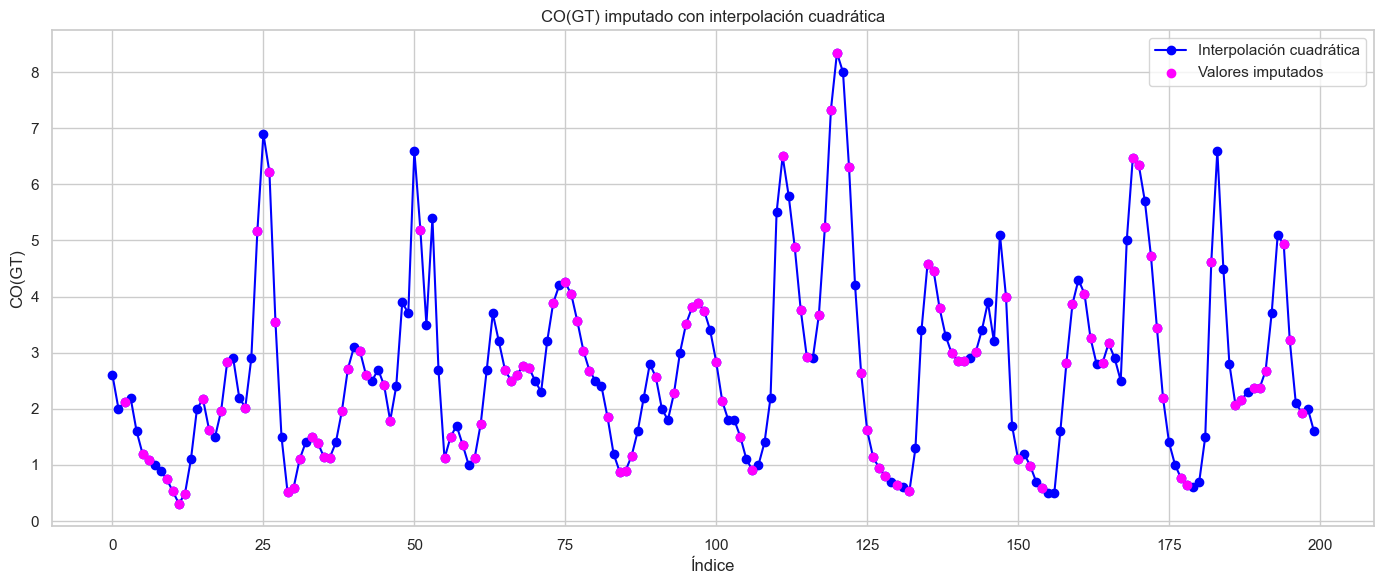

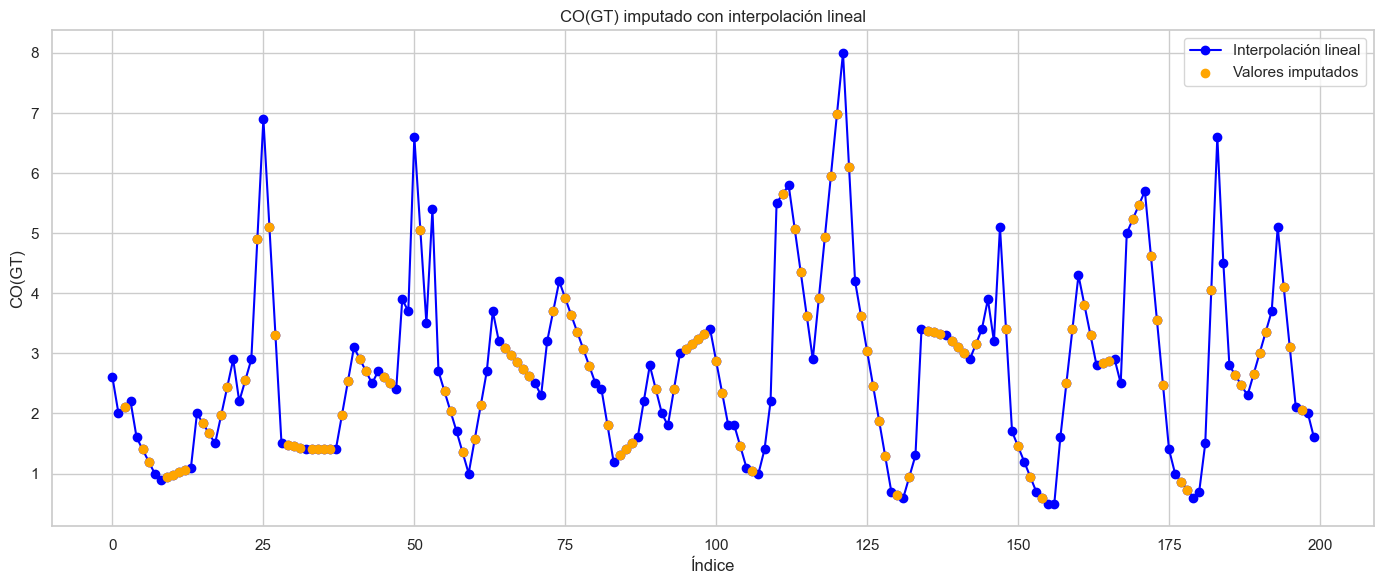

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo con delimitador correcto
file_path = r"data\AirQuality.csv"
df = pd.read_csv(file_path, sep=';', decimal=',', low_memory=False)

# Limpiar nombres de columnas
df.columns = [col.strip() for col in df.columns if col.strip() != '']

# Convertir la columna 'CO(GT)' a numérica y reemplazar -200 por NaN
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')
df['CO(GT)'] = df['CO(GT)'].replace(-200, np.nan)

# Guardar copia original sin borrar
df_original = df.head(200).copy()

# Crear versión con valores borrados
df_200 = df_original.copy()
np.random.seed(42)
indices_a_borrar = np.random.choice(df_200.index, size=100, replace=False)
df_200.loc[indices_a_borrar, 'CO(GT)'] = np.nan

df_200['CO_Interpolado'] = df_200['CO(GT)'].interpolate(method='linear')

# Gráfico 1: Serie original sin valores borrados
plt.figure(figsize=(14, 6))
plt.plot(df_original.index, df_original['CO(GT)'], color='black', label='Original completa')
plt.title('CO(GT) original sin valores borrados')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 2: Serie con valores faltantes
plt.figure(figsize=(14, 6))
plt.plot(df_200.index, df_200['CO(GT)'], marker='o', color='blue')
plt.title('CO(GT) con valores borrados')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar LOCF
df_200['CO_LOCF'] = df_200['CO(GT)'].ffill()
imputados = df_200['CO(GT)'].isna()

# Gráfico 3: LOCF
plt.figure(figsize=(14, 6))
plt.plot(df_200.index, df_200['CO_LOCF'], label='Serie imputada (LOCF)', color='blue', marker='o')
plt.scatter(df_200.index[imputados], df_200['CO_LOCF'][imputados], color='red', label='Valores imputados', zorder=5)
plt.title('CO(GT) imputado con LOCF')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar NOCB
df_200['CO_NOCB'] = df_200['CO(GT)'].bfill()
imputados_nocb = df_200['CO(GT)'].isna()

# Gráfico 4: NOCB
plt.figure(figsize=(14, 6))
plt.plot(df_200.index, df_200['CO_NOCB'], label='Serie imputada (NOCB)', color='blue', marker='o')
plt.scatter(df_200.index[imputados_nocb], df_200['CO_NOCB'][imputados_nocb], color='green', label='Valores imputados', zorder=5)
plt.title('CO(GT) imputado con NOCB')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar interpolación cuadrática
df_200['CO_Quadratic'] = df_200['CO(GT)'].interpolate(method='polynomial', order=2)

# Identificar los valores imputados
imputados_quad = df_200['CO(GT)'].isna()

# Graficar
plt.figure(figsize=(14, 6))

# Serie imputada en azul
plt.plot(df_200.index, df_200['CO_Quadratic'], label='Interpolación cuadrática', color='blue', marker='o')

# Resaltar valores imputados en fucsia
plt.scatter(df_200.index[imputados_quad], df_200['CO_Quadratic'][imputados_quad], color='fuchsia', label='Valores imputados', zorder=5)

plt.title('CO(GT) imputado con interpolación cuadrática')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Identificar los valores imputados por interpolación lineal
imputados_interp = df_200['CO(GT)'].isna()

# Interpolación lineal
plt.figure(figsize=(14, 6))
plt.plot(df_200.index, df_200['CO_Interpolado'], label='Interpolación lineal', color='blue', marker='o')
plt.scatter(df_200.index[imputados_interp], df_200['CO_Interpolado'][imputados_interp], color='orange', label='Valores imputados', zorder=5)

plt.title('CO(GT) imputado con interpolación lineal')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

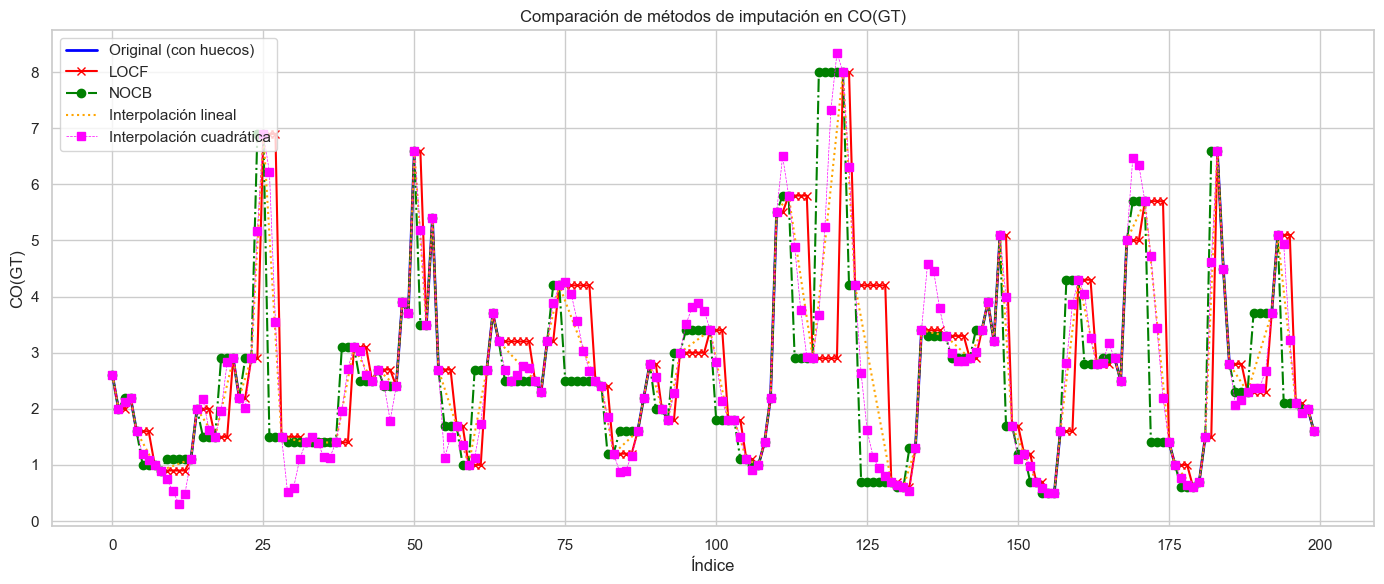

In [181]:
# Graficar
plt.figure(figsize=(14, 6))

# Señal original con huecos
plt.plot(df_200.index, df_200['CO(GT)'], label='Original (con huecos)', color='blue', linewidth=2)

# Líneas de imputación
plt.plot(df_200.index, df_200['CO_LOCF'], label='LOCF', color='red', marker='x')
plt.plot(df_200.index, df_200['CO_NOCB'], label='NOCB', color='green', linestyle='-.', marker='o')
plt.plot(df_200.index, df_200['CO_Interpolado'], label='Interpolación lineal', color='orange', linestyle=':')
plt.plot(df_200.index, df_200['CO_Quadratic'], label='Interpolación cuadrática', color='fuchsia', marker='s',linestyle='--',linewidth=0.5)

plt.title('Comparación de métodos de imputación en CO(GT)')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.legend(loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()


# <span style="color:#2F749F;"><strong>Imputación por muestreo aleatorio</strong></span>

La **imputación por muestreo aleatorio** es una técnica simple pero efectiva para reemplazar valores faltantes mediante la **selección aleatoria de valores observados** en la misma variable. En lugar de usar medidas centrales como la media o la mediana, este método **preserva la variabilidad natural** de los datos al incorporar el componente aleatorio en la imputación [(Rubin, 1987)](https://doi.org/10.1002/9781119526292).

El procedimiento consiste en identificar los valores no faltantes de una variable y, para cada observación con datos ausentes, **muestrear aleatoriamente** uno de los valores existentes. De esta forma, los valores imputados mantienen una distribución similar a la original y no distorsionan las relaciones estadísticas del conjunto de datos.


> **El procedimiento general de imputación por muestreo aleatorio puede resumirse así:**
- **Paso 1:** Identificar la variable con valores faltantes.  
- **Paso 2:** Extraer los valores observados disponibles en dicha variable.  
- **Paso 3:** Para cada valor faltante, seleccionar aleatoriamente un valor del conjunto observado.  
- **Paso 4:** Sustituir los valores ausentes por los seleccionados.  

> **Ejemplo:** Si en una base de datos de estudiantes existen valores faltantes en la variable “edad”, se puede imputar cada valor ausente tomando aleatoriamente una edad de entre las registradas.


## <span style="color:#2F749F;"><strong>Ventajas</strong></span>

- Conserva la **distribución original** de la variable.  
- Introduce **variabilidad realista**, evitando valores repetidos sistemáticamente.  
- Es de **fácil implementación** y bajo costo computacional.  
- Útil cuando los datos faltantes son **MCAR** (Missing Completely At Random).  

## <span style="color:#2F749F;"><strong>Limitaciones</strong></span>

- Puede generar **inconsistencias** si se usa en variables correlacionadas con otras.  
- No garantiza la **preservación de relaciones estadísticas** entre variables.  
- Su naturaleza aleatoria puede introducir **ruido adicional** si la proporción de datos faltantes es alta.  
- No adecuado para datos **MNAR**, donde la ausencia depende del propio valor faltante.  


## <span style="color:#2F749F;"><strong>Ejemplo 5. Predecir los valores faltantes en CO(GT) usando muestreo aleatorio. </strong></span> 

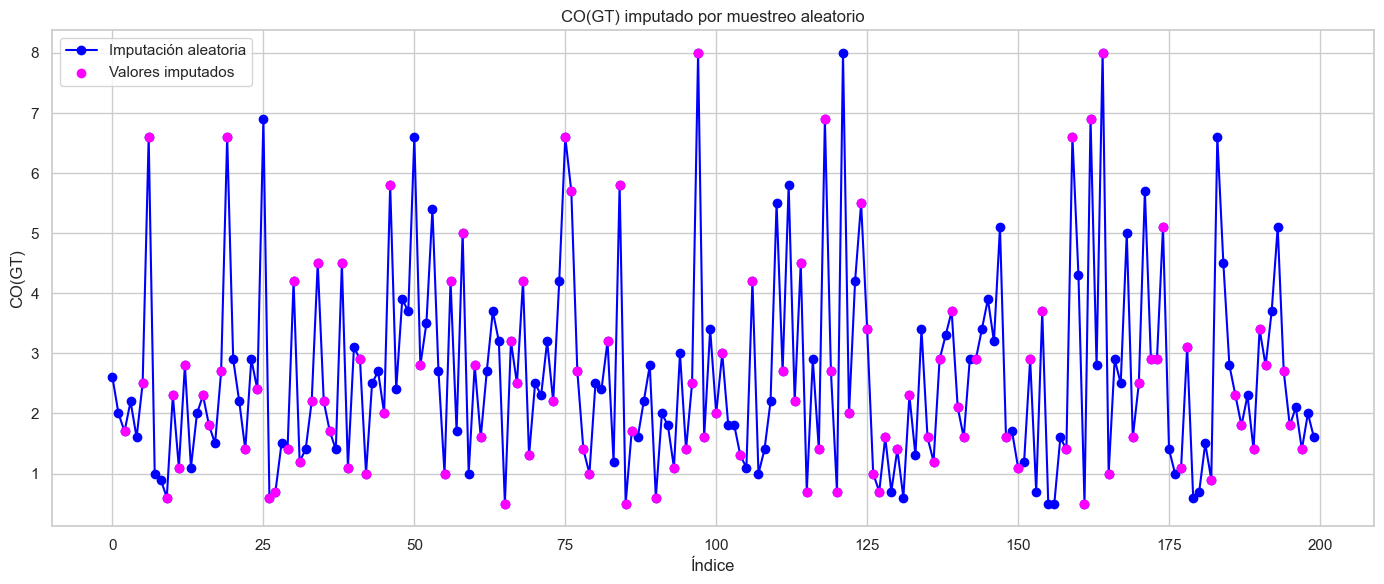

In [185]:
# Imputación por muestreo aleatorio
valores_validos = df_200['CO(GT)'].dropna().values
np.random.seed(123)  # Para reproducibilidad
valores_imputados = np.random.choice(valores_validos, size=df_200['CO(GT)'].isna().sum(), replace=True)

# Crear nueva columna con imputación
df_200['CO_Random'] = df_200['CO(GT)'].copy()
df_200.loc[df_200['CO(GT)'].isna(), 'CO_Random'] = valores_imputados

# Identificar los valores imputados
imputados_random = df_200['CO(GT)'].isna()

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(df_200.index, df_200['CO_Random'], label='Imputación aleatoria', color='blue', marker='o')
plt.scatter(df_200.index[imputados_random], df_200['CO_Random'][imputados_random], color='magenta', label='Valores imputados', zorder=5)
plt.title('CO(GT) imputado por muestreo aleatorio')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


> El **MAE (Mean Absolute Error)** mide el promedio de los errores absolutos entre los valores reales y los valores imputados o predichos. Es decir, calcula cuánto se equivocó en promedio el método al rellenar los datos faltantes.

**Interpretación:**
- MAE = 0 → imputación perfecta (todos los valores imputados son iguales a los reales).
- MAE bajo → buena aproximación.
- MAE alto → el método se equivocó más al imputar.

MAE LOCF: 1.0999999999999999
MAE NOCB: 1.0050505050505052
MAE Interpolación lineal: 0.7
MAE Interpolación cuadrática: 0.6393722303470505
MAE Muestreo aleatorio: 1.7424242424242424


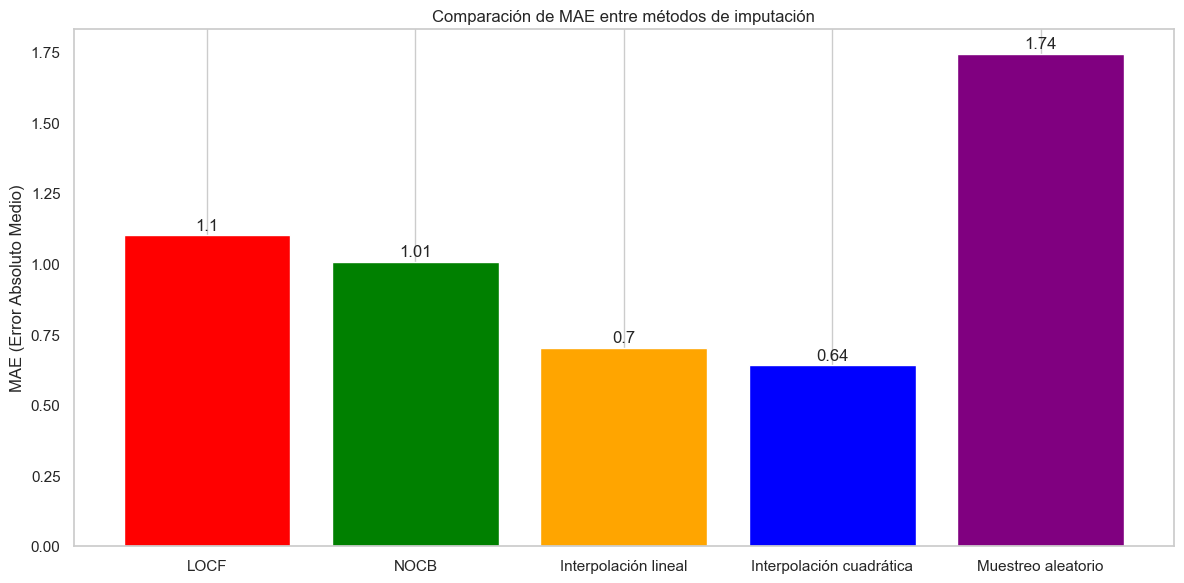

In [186]:
# Calcular errores solo en los puntos borrados
original = df_original['CO(GT)'].copy()

errores_locf = np.abs(original[indices_a_borrar] - df_200['CO_LOCF'][indices_a_borrar])
errores_nocb = np.abs(original[indices_a_borrar] - df_200['CO_NOCB'][indices_a_borrar])
errores_interp = np.abs(original[indices_a_borrar] - df_200['CO_Interpolado'][indices_a_borrar])
errores_quad = np.abs(original[indices_a_borrar] - df_200['CO_Quadratic'][indices_a_borrar])
errores_random = np.abs(original[indices_a_borrar] - df_200['CO_Random'][indices_a_borrar])

# Calcular MAE
mae_locf = errores_locf.mean()
mae_nocb = errores_nocb.mean()
mae_interp = errores_interp.mean()
mae_quad = errores_quad.mean()
mae_random = errores_random.mean()

# Mostrar resultados
print("MAE LOCF:", mae_locf)
print("MAE NOCB:", mae_nocb)
print("MAE Interpolación lineal:", mae_interp)
print("MAE Interpolación cuadrática:", mae_quad)
print("MAE Muestreo aleatorio:", mae_random)

# Visualizar en gráfico de barras
metodos = ['LOCF', 'NOCB', 'Interpolación lineal', 'Interpolación cuadrática', 'Muestreo aleatorio']
mae_valores = [mae_locf, mae_nocb, mae_interp, mae_quad, mae_random]

plt.figure(figsize=(12, 6))
bars = plt.bar(metodos, mae_valores, color=['red', 'green', 'orange', 'blue', 'purple'])
plt.title('Comparación de MAE entre métodos de imputación')
plt.ylabel('MAE (Error Absoluto Medio)')
plt.grid(axis='y')

# Añadir etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# <span style="color:#2F749F;"><strong>Referencias</strong></span>

Little, R. J. A., & Rubin, D. B. (2019). [*Statistical analysis with missing data*](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119482260). John Wiley & Sons.  

Van Buuren, S. (2018). [*Flexible imputation of missing data*](https://stefvanbuuren.name/fimd/). CRC Press.  

Zhang, S. (2011). [*Shell-neighbor method and its application in missing data imputation*](https://link.springer.com/article/10.1007/s10489-009-0207-6#:~:text=The%20SNI%20fills%20in%20an,neighbors%20of%20the%20incomplete%20instance.). *Knowledge-Based Systems, 24*(5), 709–715.  
